**Face Detection: Model Hub**

- download the model from the Model Hub
- detect 106 main face points
- display the image all these points

In [1]:
 @file:Repository("*mavenLocal")

In [2]:
import org.jetbrains.kotlinx.dl.api.summary.printSummary
import org.jetbrains.kotlinx.dl.impl.preprocessing.image.ImageConverter
import org.jetbrains.kotlinx.dl.onnx.inference.ONNXModelHub
import org.jetbrains.kotlinx.dl.onnx.inference.ONNXModels
import java.io.File
import javax.imageio.ImageIO
import second.PROJECT_ROOT

In [3]:
val PATH_TO_IMAGE = "${PROJECT_ROOT}src/main/resources/datasets/faces/image3.jpeg"

val PATH_TO_PRETRAINED_MODELS = "../../../cache/pretrainedModels"

**Download the model from the model hub**

In [4]:
val modelHub = ONNXModelHub(cacheDirectory = File(PATH_TO_PRETRAINED_MODELS))
val faceAlignmentModel = ONNXModels.FaceAlignment.Fan2d106.pretrainedModel(modelHub)

In [5]:
faceAlignmentModel.printSummary()

Fan2d106 model summary
Model type: ONNX
_____________________________________________________
Inputs  Type                                         
data    Tensor {dtype=FLOAT, shape [-1, 3, 192, 192]}
_____________________________________________________
Outputs Type                                         
fc1     Tensor {dtype=FLOAT, shape [1, 212]}         
_____________________________________________________


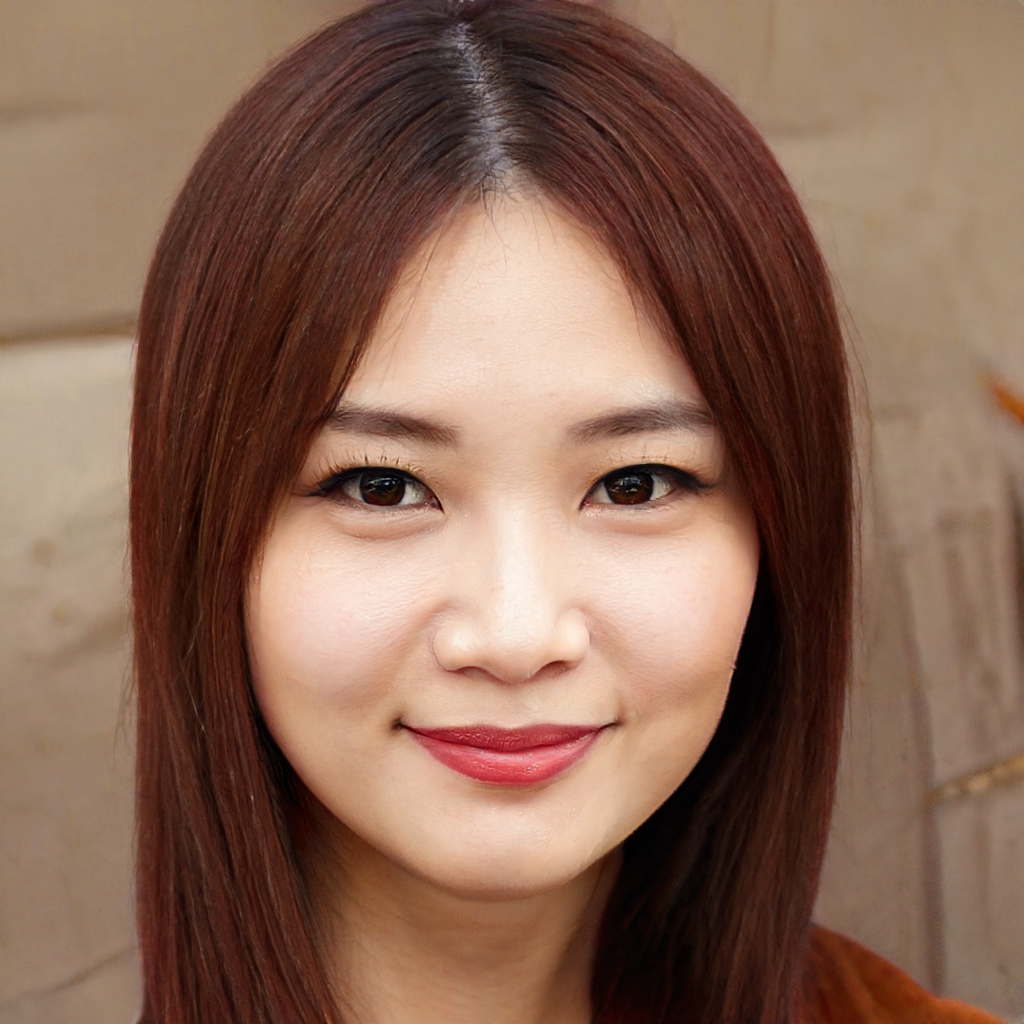

In [6]:
val image = ImageIO.read(File(PATH_TO_IMAGE))

DISPLAY(image)

**Detect face's landmarks**

In [7]:
val landmarks = faceAlignmentModel.detectLandmarks(image)
faceAlignmentModel.close()

**Let's draw landmarks**

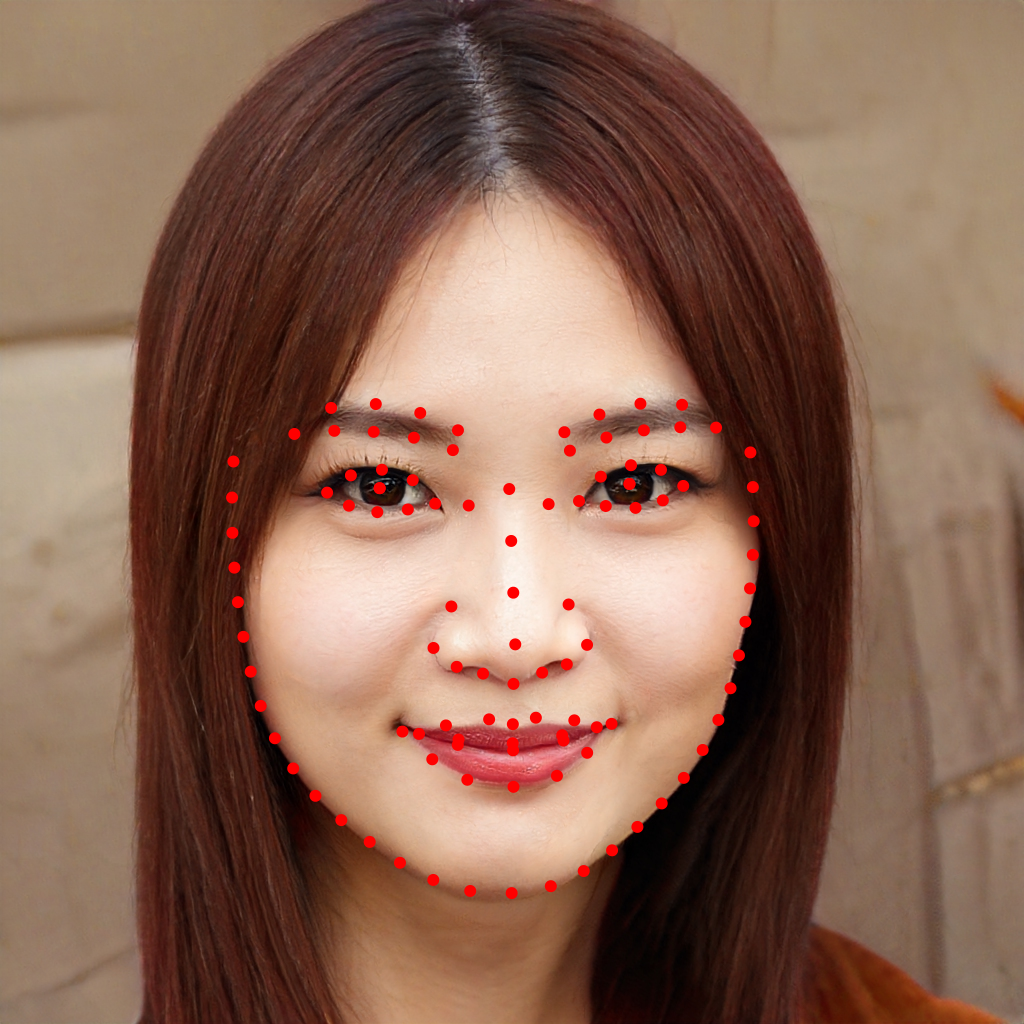

In [8]:
import second.drawDetectedFace

val bufferedImageWithPoses = drawDetectedFace(image, landmarks)
DISPLAY(bufferedImageWithPoses)